In [1]:
from jqdatasdk import *
import pandas as pd
import mplfinance as mpf
import time
auth('15918636606', 'Ucb16697')

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [2]:
code = "000100.XSHE" #601899.XSHG 紫金矿业 000100.XSHE tcl科技
start_date = get_security_info('601899.XSHG').start_date.strftime('%Y-%m-%d')#获得股票上市时间
current_date = time.strftime("%Y-%m-%d", time.localtime())#获得当前时间
df = get_price(code, start_date=start_date, end_date=current_date, frequency='daily', fields=['open', 'close', 'high', 'low', 'volume'],fq='pre')

In [3]:
df.index = pd.DatetimeIndex(df.index)# 可直接多索引进行操作
open1=df['open']
high2=df['high']
low3=df['low']
close4=df['close']
volume5=df['volume']
data=pd.concat([open1,high2,low3,close4,volume5],keys=['open', 'high','low' ,'close','volume'],axis=1)
#红色上涨，绿色下跌
mc = mpf.make_marketcolors(up='r',down='g',edge='inherit',
                            wick={'up':'r','down':'g'},
                            volume='cornflowerblue',
                            ohlc='i'
                            )
s  = mpf.make_mpf_style(marketcolors=mc)

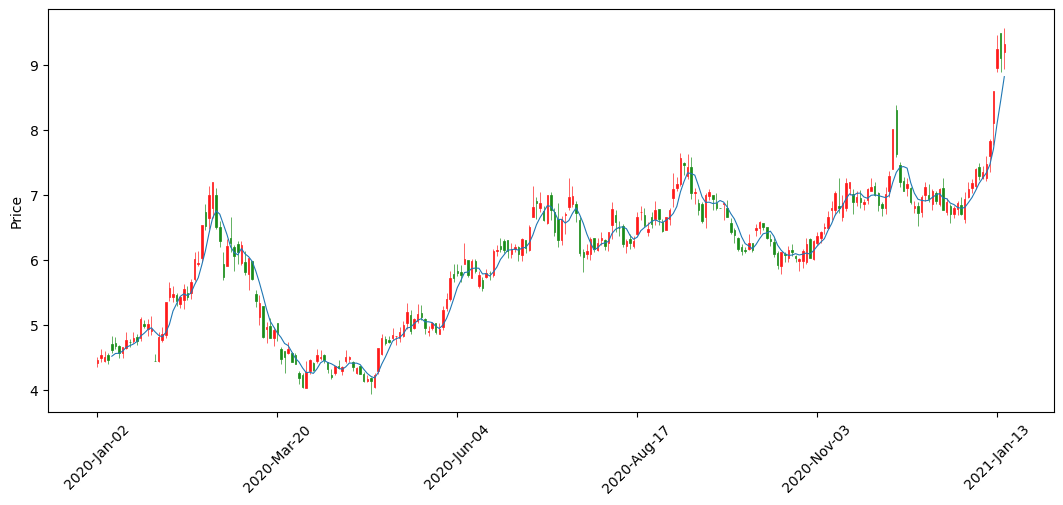

In [4]:
mpf.plot(data[data.index>"2019-12-31"],figscale=1,mav=5,figratio=(17,7),type='candle', style=s)

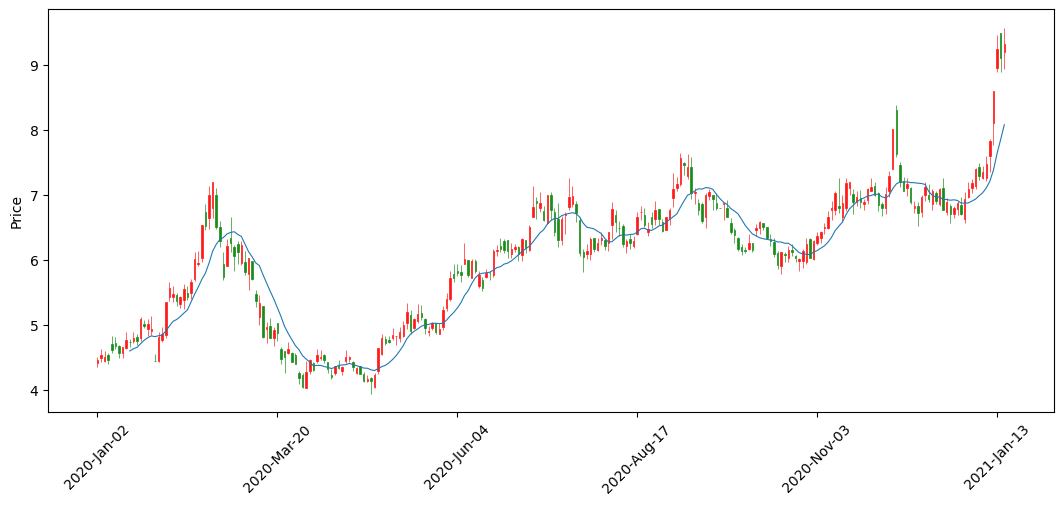

In [5]:
mpf.plot(data[data.index>"2019-12-31"],figscale=1,mav=10,figratio=(17,7),type='candle', style=s)

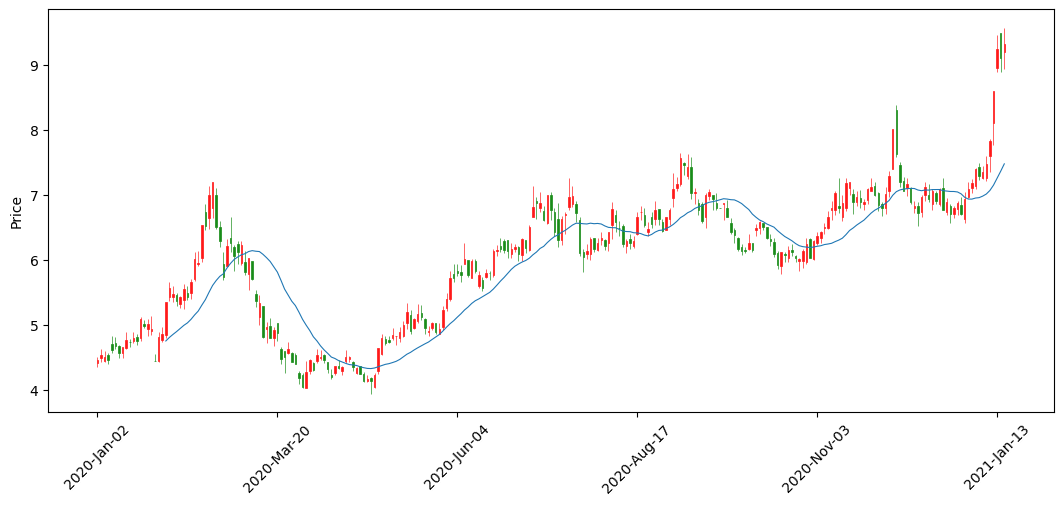

In [6]:
mpf.plot(data[data.index>"2019-12-31"],figscale=1,mav=20,figratio=(17,7),type='candle', style=s)

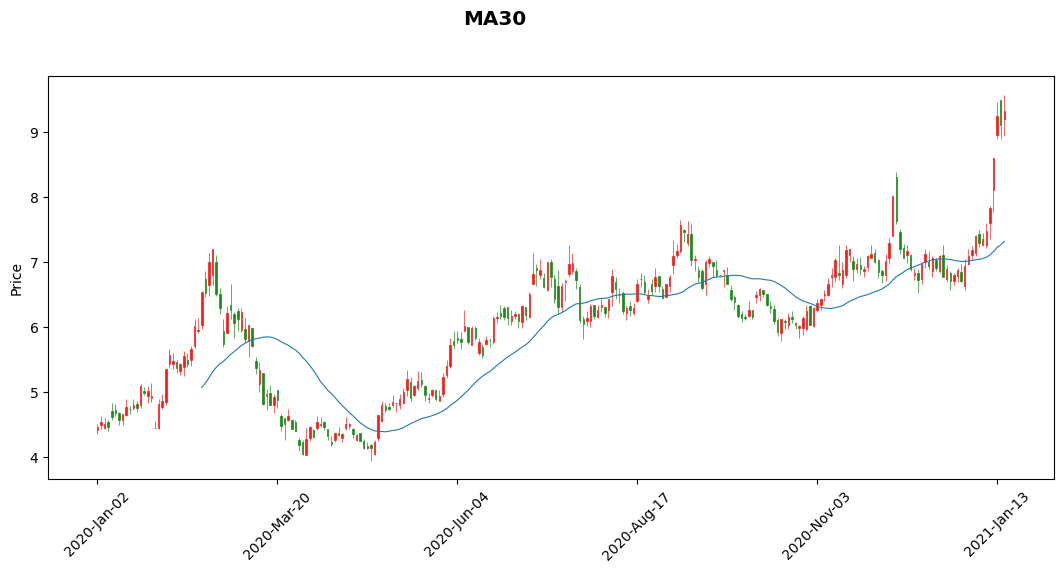

In [9]:
mpf.plot(data[data.index>"2019-12-31"],figscale=1,mav=30,figratio=(17,7),type='candle', style=s, title='MA30')